# Biology and Environmental Science

![](https://srv.latostadora.com/designall.dll/hog_wild_iowa--i:13562384505201356232113331;b:f8f8f8;s:F_I1;f:f;k:a0fc6abda507f7eda3783217f1a381e8.jpg)

For the week ending in 5/29/13, the Iowa Department of Agriculture reported the mean weight of barrows and gilts (young male and female hogs) as 25 pounds. To check this claim, a random sample of twelve hogs was obtained and each was carefully weighed.

[Purdue Labs](http://www.stat.purdue.edu/~lfindsen/stat350/Lab5.pdf)
[Purdue Lab - 5 part 2](http://www.stat.purdue.edu/~jtroisi/STAT350Spring2015/labs/lab5/lab5.pdf)


In [11]:
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style
import statsmodels.api as sm #QQ plot

In [89]:
weight = [31, 31, 43, 36, 23, 34, 32, 30, 20, 24]

mu = np.mean(weight)
sigma = np.std(weight)

num_bins = 50

> Create a histogram, boxplot, and a Normal quantile plot of these data

> Write a description of the distribution using the results in part 2. Comment on the skewness and Normality of the data. Note if there are any outliers

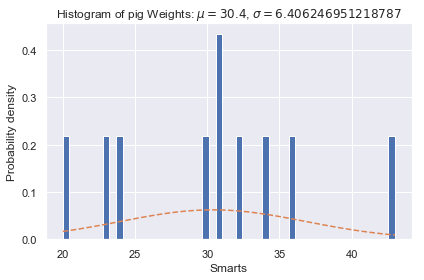

In [90]:
fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(weight, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of pig Weights: $\mu={}$, $\sigma={}$'.format(mu, sigma))

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

The historgam above appears to be normally distributed wiht fat tails. 

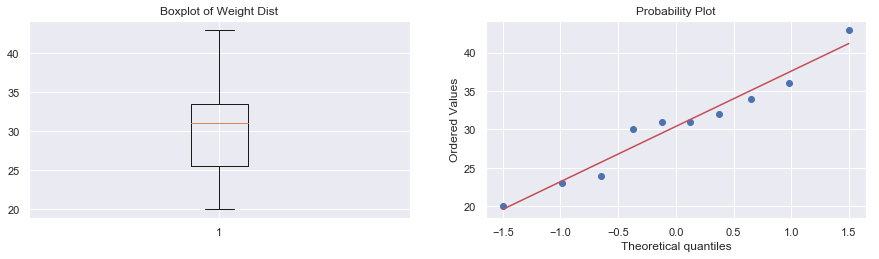

In [91]:
# Plot Distributions
fig = plt.figure(figsize=(15,8))

plt.subplot(2, 2, 1)
plt.title('Boxplot of Weight Dist')
plt.boxplot(weight)

plt.subplot(2, 2, 2)
plt.title('QQ plot')
import scipy.stats as stats
stats.probplot(weight, plot=plt)
plt.show()


__Boxplot:__ Appears to be equal in variance with no outliers. Howeever the box plot indicates confirmance to normality.

__QQ Plot:__ The observations generally are close to the linear line but shows a minor S-shaped slope in the middle of the distribution.__The QQ plot suggest realitive conformance to normality__ 

> is it appropriate to analyze these data using the t or z procedures? Briefly explain your response. The answer should be the same for the t and z procedures.

Our evaluation of the normal distribution appears to conform to the normal distribution assumptions. Since we were only given sample data and are unaware of the standard devation and the sample size of 10, __we cannot use the CLT__ we should use the t-distribution. 

> Find a 95% z confidence interval for the true mean weight of barrows and
gilts

![](https://www.geoib.com/uploads/7/6/3/9/7639044/90422.jpg?407)

[confidence interval](https://www.quantconnect.com/tutorials/introduction-to-financial-python/confidence-interval-and-hypothesis-testing)

In [92]:
# assume sample standard deviaiton = populaiton std.
n = len(weight)
x_bar = mu
null_ = 25
s = np.var(weight) # sample varance
se = sigma / np.sqrt(n)

z_value = (x_bar - null_) / se
z_star = stats.norm.ppf(.975)
# 1.959963984540054

# estimate interval of populaiton of 95%
# (μ−1.96∗SE,μ+1.96∗SE)

ci_low = x_bar - (z_star * se)
ci_high = x_bar + (z_star * se)


print("z score: ", z_value)
print("Confidence Interval from: {} to {}".format(ci_low, ci_high))

z score:  2.6655699499159153
Confidence Interval from: 26.42943996391835 to 34.37056003608164


> Find a 95% t confidence interval for the true mean weight of barrows and
gilts.

![](http://knowledgehills.com/content/images/Six-Sigma/Six-Sigma-t-Confidence-Interval-Mean-Formula.gif)

[details](https://scientificallysound.org/2017/05/16/independent-t-test-python/) [2](http://codefellows.github.io/sea-python-401d2/lectures/stats_day3.html)

In [93]:
df_ = len(weight) - 1
se = sigma / np.sqrt(n)

t_value = (x_bar - null_) / se

t_star = stats.t.ppf([0.975], df = df_)

ci_low = x_bar - (t_star * se)
ci_high = x_bar + (t_star * se)


print("t score: ", t_value)
print("Confidence Interval from: {} to {}".format(ci_low, ci_high))

t score:  2.6655699499159153
Confidence Interval from: [25.817247] to [34.982753]


In [100]:
tt = (x_bar-null_)/np.sqrt(s/float(n))  # t-statistic for mean
pval = stats.t.sf(np.abs(tt), n-1)*2  # two-sided pvalue = Prob(abs(t)>tt)
print ('t-statistic = %6.3f pvalue = %6.4f' % (tt, pval))

t-statistic =  2.666 pvalue = 0.0258


> Are these two intervals the same or different? Please explain your answer. If they are different, comment on the reason.

These two intervals are difference because in the z-test we assumed no population standard deviaiton, in which we replace it with the estimated sample deviaiton. Additionally, the difference also comes from the fact our sample size of normal data is less than 30. 

Also the t-distribution is more conserivtive. 

H0: weight = 25

HA: weight != 25

In [53]:
stats.ttest_1samp(weight, 25)

Ttest_1sampResult(statistic=2.528781691270573, pvalue=0.03229987398986024)

We reject the null hypotheisis indicating weights is not equal to 25